In [5]:
# SET THIS PATH TO THE LOCATION OF COAMP_GRAPH.PY
caper_dir = "/home/jens/Desktop/research/dev/AmpliconRepository/caper/caper"  # Jens

from configure_env import *
configure_env(caper_dir)
import coamp_graph
import importlib
importlib.reload(coamp_graph)  # This makes it so you don't need to restart kernel between changes to codebase
from coamp_graph import Graph
import coamp_graph_notebook_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

config.sh sourced successfully!


In [6]:
project_list = ["HMF_2","PCAWG", "TCGA"]
df, __ = coamp_graph_notebook_utils.concat_projects(project_list)
graph = Graph(df)
nodes = graph.Nodes()
edges = graph.Edges()

Using reference genome: hg19 (input references: ['GRCh37'])
Filtering features took 0.0131 seconds, resulting in 2368 features
Preprocessing intervals and reformatting dataset took 0.0774 seconds
Preprocessed dataset for 6366 samples
Loaded 20375 genes from hg19 in 3.92 seconds
Total gene name variants: 40750
Genes with location data: 20375
Starting CreateNodes with 2368 rows
Note: 0 genes are amplified on multiple feature IDs in the same sample
TEST: 44255 searches where gene's location is found
TEST: 44255 searches where gene's chr on interval and gene's location is matched to an interval
TEST: 0 searches where gene's chr on interval but gene's location is NOT matched to an interval (0 unique nodes)
TEST: 0 searches where gene's chr not on interval (0 unique nodes)
Processing 44255 genes took 0.3062 seconds, resulting in 11180 unique nodes
0 genes were marked amplified on a set of empty intervals
Total CreateNodes execution: 0.3074 seconds
Starting CreateEdges with 11180 nodes
Buildi

In [7]:
p_single, p_multi_interval, p_multi_chr, p_multi_ecdna = [], [], [], []
q_single, q_multi_interval, q_multi_chr, q_multi_ecdna = [], [], [], []
na_counter = 0
for edge in edges:
    p_vals = edge.get('p_values', [-1, -1, -1, -1])
    q_vals = edge.get('q_values', [-1, -1, -1, -1])
    if p_vals == [-1, -1, -1, -1]:# and edge.get('missing_interval_data'):
        na_counter += 1
    if len(p_vals) == 4:
        p_single.append(p_vals[0])
        p_multi_interval.append(p_vals[1])
        p_multi_chr.append(p_vals[2])
        p_multi_ecdna.append(p_vals[3])
    if len(q_vals) == 4:
        q_single.append(q_vals[0])
        q_multi_interval.append(q_vals[1])
        q_multi_chr.append(q_vals[2])
        q_multi_ecdna.append(q_vals[3])

print(f"{na_counter} NA test edges!")

342412 NA test edges!


In [4]:
def every_fifth_percentile(data):
    data = np.array(data)
    percentiles = np.arange(5, 100, 5)
    return {p: np.percentile(data, p) for p in percentiles}

# Calculate the percentiles and format them
def print_percentiles_aligned(data):
    results = every_fifth_percentile(data)

    # Format and find max width for alignment
    formatted = {k: f"{v:.4f}" for k, v in results.items()}
    max_width = max(len(val) for val in formatted.values())

    for k in sorted(formatted):
        print(f"{k:>2}th percentile: {formatted[k]:>{max_width}}")

def plot_p_values(p_values, title="p_values"):
    filtered = [p for p in p_values if p != -1]
    print(f"{len(filtered)} valid p-values from {len(p_values)} edges\n")
    
    print_percentiles_aligned(filtered)
    
    plt.figure(figsize=(8, 6))
    plt.hist(filtered, bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("p-values")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

149862 valid p-values from 750365 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0003
20th percentile: 0.0023
25th percentile: 0.0078
30th percentile: 0.0171
35th percentile: 0.0308
40th percentile: 0.0494
45th percentile: 0.0733
50th percentile: 0.0989
55th percentile: 0.1274
60th percentile: 0.1592
65th percentile: 0.1955
70th percentile: 0.2374
75th percentile: 0.2782
80th percentile: 0.3421
85th percentile: 0.5000
90th percentile: 0.8684
95th percentile: 0.9684


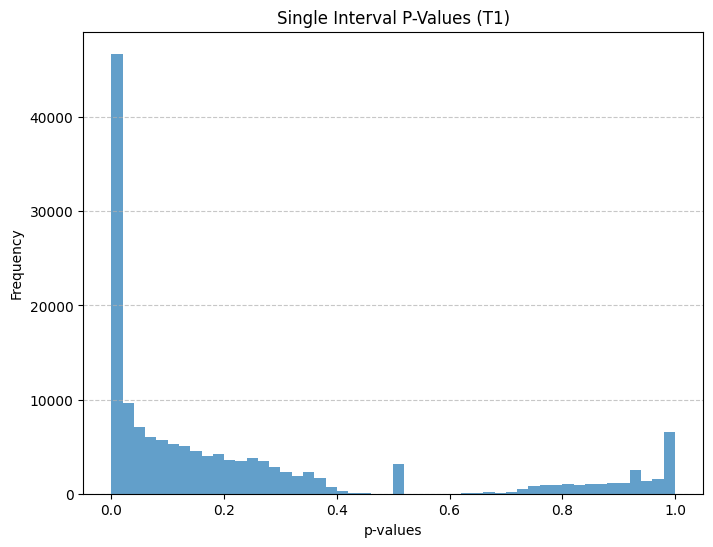

'\nBefore 11/4/2025\n126189 valid p-values from 374210 edges\n\n 5th percentile: 0.0000\n10th percentile: 0.0019\n15th percentile: 0.0091\n20th percentile: 0.0220\n25th percentile: 0.0392\n30th percentile: 0.0507\n35th percentile: 0.0631\n40th percentile: 0.0757\n45th percentile: 0.0906\n50th percentile: 0.1071\n55th percentile: 0.1246\n60th percentile: 0.1444\n65th percentile: 0.1660\n70th percentile: 0.1900\n75th percentile: 0.2156\n80th percentile: 0.2438\n85th percentile: 0.2737\n90th percentile: 0.3147\n95th percentile: 0.4111\n\nBefore 11/6\n126189 valid p-values from 374210 edges\n\n 5th percentile: 0.0000\n10th percentile: 0.0000\n15th percentile: 0.0001\n20th percentile: 0.0008\n25th percentile: 0.0041\n30th percentile: 0.0113\n35th percentile: 0.0254\n40th percentile: 0.0417\n45th percentile: 0.0513\n50th percentile: 0.0616\n55th percentile: 0.0746\n60th percentile: 0.0912\n65th percentile: 0.1101\n70th percentile: 0.1315\n75th percentile: 0.1573\n80th percentile: 0.1869\n85t

In [316]:
plot_p_values(p_single, title=f"Single Interval P-Values (T1)")

"""
Before 11/4/2025
126189 valid p-values from 374210 edges

 5th percentile: 0.0000
10th percentile: 0.0019
15th percentile: 0.0091
20th percentile: 0.0220
25th percentile: 0.0392
30th percentile: 0.0507
35th percentile: 0.0631
40th percentile: 0.0757
45th percentile: 0.0906
50th percentile: 0.1071
55th percentile: 0.1246
60th percentile: 0.1444
65th percentile: 0.1660
70th percentile: 0.1900
75th percentile: 0.2156
80th percentile: 0.2438
85th percentile: 0.2737
90th percentile: 0.3147
95th percentile: 0.4111

Before 11/6
126189 valid p-values from 374210 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0001
20th percentile: 0.0008
25th percentile: 0.0041
30th percentile: 0.0113
35th percentile: 0.0254
40th percentile: 0.0417
45th percentile: 0.0513
50th percentile: 0.0616
55th percentile: 0.0746
60th percentile: 0.0912
65th percentile: 0.1101
70th percentile: 0.1315
75th percentile: 0.1573
80th percentile: 0.1869
85th percentile: 0.2234
90th percentile: 0.2784
95th percentile: 0.4119

Before 11/8
47309 valid p-values from 374210 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0000
20th percentile: 0.0007
25th percentile: 0.0035
30th percentile: 0.0099
35th percentile: 0.0210
40th percentile: 0.0372
45th percentile: 0.0589
50th percentile: 0.0870
55th percentile: 0.1227
60th percentile: 0.1639
65th percentile: 0.2153
70th percentile: 0.2642
75th percentile: 0.3171
80th percentile: 0.4223
85th percentile: 0.7827
90th percentile: 0.8901
95th percentile: 0.9626

"""

149862 valid p-values from 750365 edges

 5th percentile: 0.0000
10th percentile: 0.0001
15th percentile: 0.0020
20th percentile: 0.0117
25th percentile: 0.0314
30th percentile: 0.0572
35th percentile: 0.0881
40th percentile: 0.1235
45th percentile: 0.1629
50th percentile: 0.1978
55th percentile: 0.2316
60th percentile: 0.2653
65th percentile: 0.3007
70th percentile: 0.3392
75th percentile: 0.3710
80th percentile: 0.4276
85th percentile: 0.5858
90th percentile: 0.9649
95th percentile: 1.0000


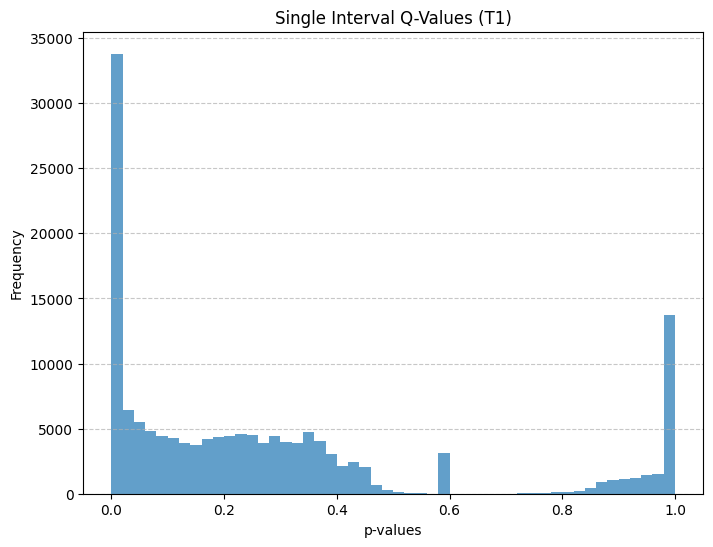

In [317]:
plot_p_values(q_single, title=f"Single Interval Q-Values (T1)")

180184 valid p-values from 750365 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0000
20th percentile: 0.0000
25th percentile: 0.0000
30th percentile: 0.0000
35th percentile: 0.0000
40th percentile: 0.0000
45th percentile: 0.0000
50th percentile: 0.0000
55th percentile: 0.0000
60th percentile: 0.0000
65th percentile: 0.0000
70th percentile: 0.0000
75th percentile: 0.0000
80th percentile: 0.0000
85th percentile: 0.0000
90th percentile: 0.0000
95th percentile: 0.0000


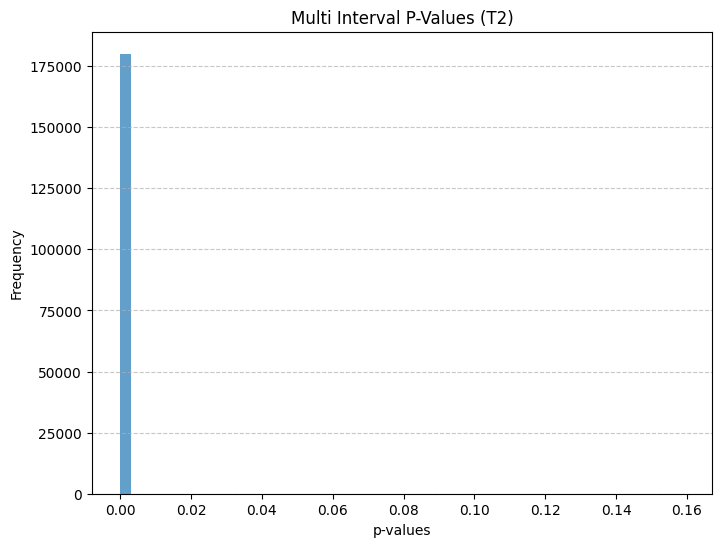

'\nBefore 11/4/25\n165200 valid p-values from 374210 edges\n\n 5th percentile: 0.0000\n10th percentile: 0.0000\n15th percentile: 0.0000\n20th percentile: 0.0000\n25th percentile: 0.0000\n30th percentile: 0.0000\n35th percentile: 0.0000\n40th percentile: 0.0000\n45th percentile: 0.0000\n50th percentile: 0.0000\n55th percentile: 0.0000\n60th percentile: 0.0010\n65th percentile: 0.0107\n70th percentile: 0.0342\n75th percentile: 0.0406\n80th percentile: 0.0440\n85th percentile: 0.0461\n90th percentile: 0.0489\n95th percentile: 0.0531\n'

In [318]:
plot_p_values(p_multi_interval, title=f"Multi Interval P-Values (T2)")

"""
Before 11/4/25
165200 valid p-values from 374210 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0000
20th percentile: 0.0000
25th percentile: 0.0000
30th percentile: 0.0000
35th percentile: 0.0000
40th percentile: 0.0000
45th percentile: 0.0000
50th percentile: 0.0000
55th percentile: 0.0000
60th percentile: 0.0010
65th percentile: 0.0107
70th percentile: 0.0342
75th percentile: 0.0406
80th percentile: 0.0440
85th percentile: 0.0461
90th percentile: 0.0489
95th percentile: 0.0531
"""

180184 valid p-values from 750365 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0000
20th percentile: 0.0000
25th percentile: 0.0000
30th percentile: 0.0000
35th percentile: 0.0000
40th percentile: 0.0000
45th percentile: 0.0000
50th percentile: 0.0000
55th percentile: 0.0000
60th percentile: 0.0000
65th percentile: 0.0000
70th percentile: 0.0000
75th percentile: 0.0000
80th percentile: 0.0000
85th percentile: 0.0000
90th percentile: 0.0000
95th percentile: 0.0000


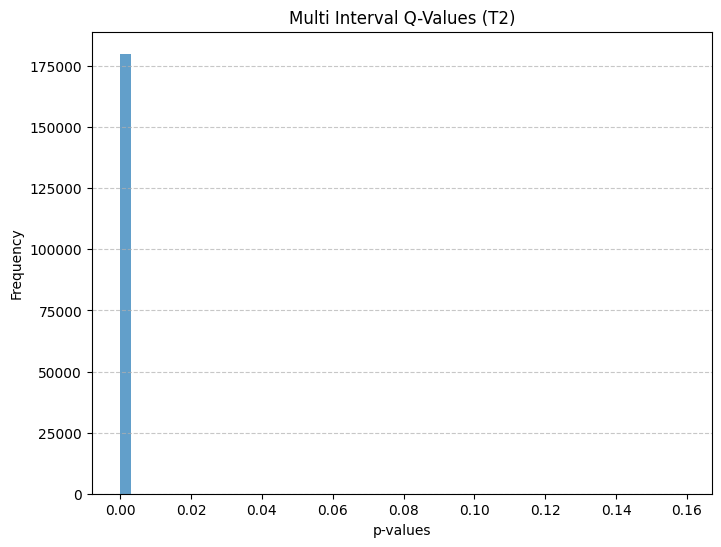

In [319]:
plot_p_values(q_multi_interval, title=f"Multi Interval Q-Values (T2)")

109583 valid p-values from 750365 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0000
20th percentile: 0.0000
25th percentile: 0.0000
30th percentile: 0.0000
35th percentile: 0.0000
40th percentile: 0.0000
45th percentile: 0.0000
50th percentile: 0.0000
55th percentile: 0.0000
60th percentile: 0.0000
65th percentile: 0.0000
70th percentile: 0.0000
75th percentile: 0.0000
80th percentile: 0.0000
85th percentile: 0.0000
90th percentile: 0.0000
95th percentile: 0.0000


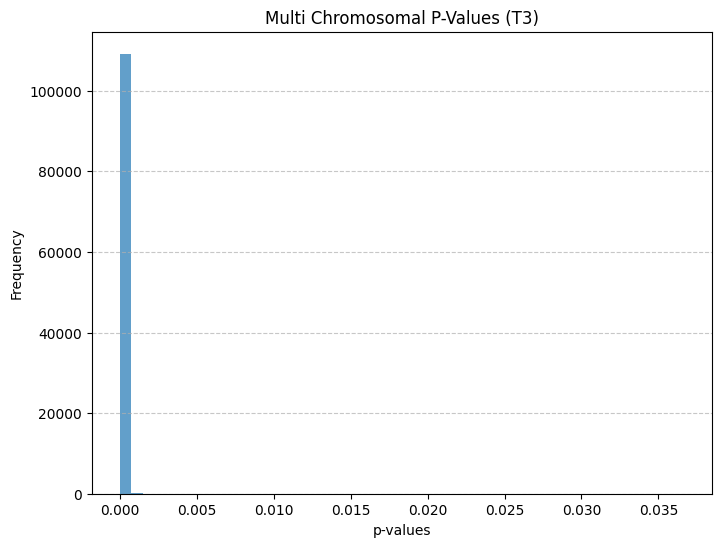

In [320]:
plot_p_values(p_multi_chr, title=f"Multi Chromosomal P-Values (T3)")

109583 valid p-values from 750365 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0000
20th percentile: 0.0000
25th percentile: 0.0000
30th percentile: 0.0000
35th percentile: 0.0000
40th percentile: 0.0000
45th percentile: 0.0000
50th percentile: 0.0000
55th percentile: 0.0000
60th percentile: 0.0000
65th percentile: 0.0000
70th percentile: 0.0000
75th percentile: 0.0000
80th percentile: 0.0000
85th percentile: 0.0000
90th percentile: 0.0000
95th percentile: 0.0000


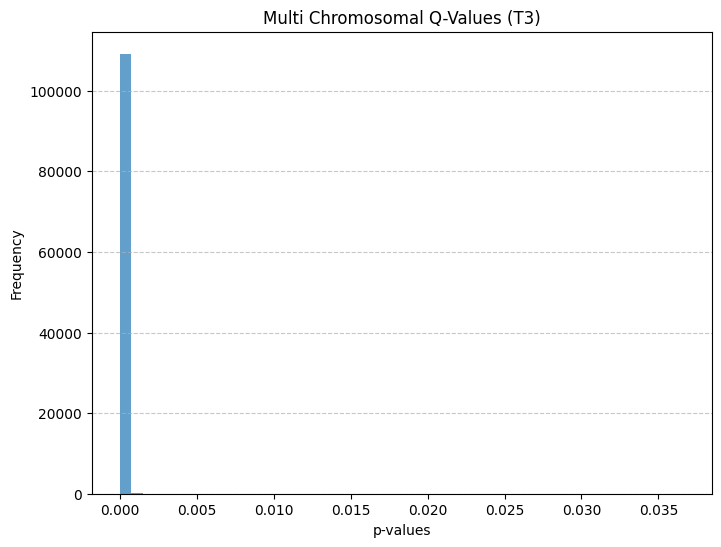

In [321]:
plot_p_values(q_multi_chr, title=f"Multi Chromosomal Q-Values (T3)")

23069 valid p-values from 750365 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0000
20th percentile: 0.0000
25th percentile: 0.0000
30th percentile: 0.0000
35th percentile: 0.0000
40th percentile: 0.0000
45th percentile: 0.0000
50th percentile: 0.0000
55th percentile: 0.0000
60th percentile: 0.0000
65th percentile: 0.0000
70th percentile: 0.0000
75th percentile: 0.0000
80th percentile: 0.0000
85th percentile: 0.0000
90th percentile: 0.0002
95th percentile: 0.0017


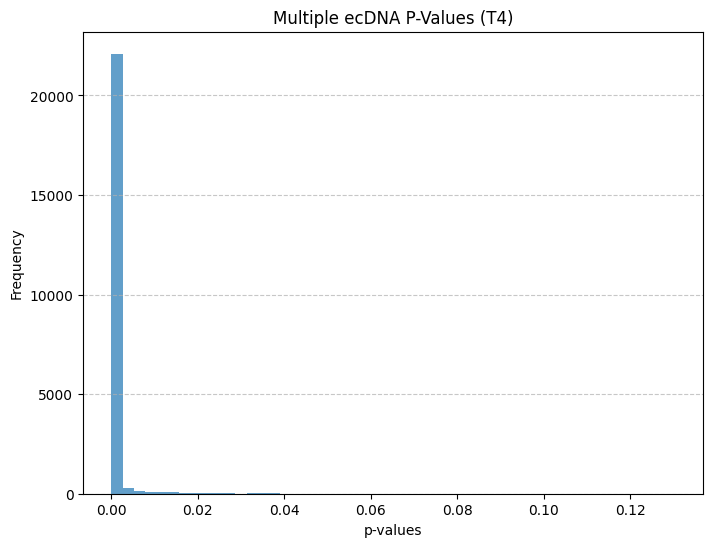

In [322]:
plot_p_values(p_multi_ecdna, title=f"Multiple ecDNA P-Values (T4)")

23069 valid p-values from 750365 edges

 5th percentile: 0.0000
10th percentile: 0.0000
15th percentile: 0.0000
20th percentile: 0.0000
25th percentile: 0.0000
30th percentile: 0.0000
35th percentile: 0.0000
40th percentile: 0.0000
45th percentile: 0.0000
50th percentile: 0.0000
55th percentile: 0.0000
60th percentile: 0.0000
65th percentile: 0.0000
70th percentile: 0.0000
75th percentile: 0.0000
80th percentile: 0.0000
85th percentile: 0.0000
90th percentile: 0.0002
95th percentile: 0.0018


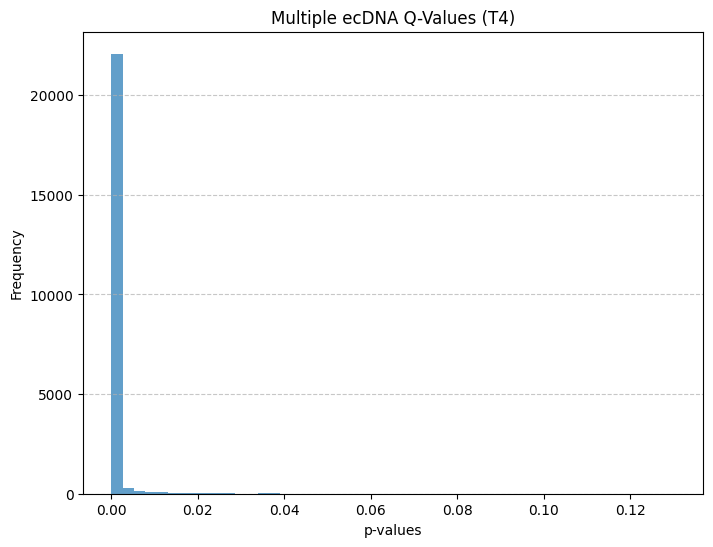

In [323]:
plot_p_values(q_multi_ecdna, title=f"Multiple ecDNA Q-Values (T4)")

In [8]:
df_with_ids = graph.get_edges_dataframe(include_sample_ids=False)
df_with_ids.to_csv("all_coamps.csv", index=False)

# Filtered table: only rows where any of the four individual test p-values < 0.05 and != -1
p_value_cols = [col for col in df_with_ids.columns if col.lower().startswith("p_") and col != 'p_d_D']

# Create mask for rows where at least one p-value is < 0.05 and != -1
mask = pd.Series([False] * len(df_with_ids), index=df_with_ids.index)
for col in p_value_cols:
    mask = mask | ((df_with_ids[col] < 0.05) & (df_with_ids[col] != -1))

df_filtered = df_with_ids[mask]
df_filtered.to_csv("filtered_coamps_p_below_0.05.csv", index=False)

# Filtered table: only rows where multi_interval, multi_chromosomal, or multi_ecdna are significant
# (excluding single_interval)
mask_no_single = (
    ((df_with_ids['p_multi_interval'] < 0.05) & (df_with_ids['p_multi_interval'] != -1)) |
    ((df_with_ids['p_multi_chromosomal'] < 0.05) & (df_with_ids['p_multi_chromosomal'] != -1)) |
    ((df_with_ids['p_multi_ecdna'] < 0.05) & (df_with_ids['p_multi_ecdna'] != -1))
)
df_filtered_no_single = df_with_ids[mask_no_single]
df_filtered_no_single.to_csv("filtered_coamps_p_below_0.05_no_single_interval.csv", index=False)
print(f"Saved {len(df_filtered_no_single)} edges excluding single_interval test")

# Create separate CSV files for each test type with test-specific sorting
test_types = ['single_interval', 'multi_interval', 'multi_chromosomal', 'multi_ecdna']

for test_type in test_types:
    p_col = f'p_{test_type}'
    count_col = f'count_{test_type}'
    
    # Filter rows where this specific test is significant (p < 0.05 and != -1)
    test_mask = (df_with_ids[p_col] < 0.05) & (df_with_ids[p_col] != -1)
    df_test = df_with_ids[test_mask].copy()
    
    # Add temporary columns for sorting
    df_test['max_samples'] = df_test[['gene1_samples', 'gene2_samples']].max(axis=1)
    df_test['min_samples'] = df_test[['gene1_samples', 'gene2_samples']].min(axis=1)
    
    # Sort by: test count (desc), shared_samples (desc), max_samples (desc), min_samples (desc), gene1 (asc)
    df_test = df_test.sort_values(
        by=[count_col, 'shared_samples', 'max_samples', 'min_samples', 'gene1'],
        ascending=[False, False, False, False, True]
    )
    
    # Drop helper columns and reset index
    df_test = df_test.drop(columns=['max_samples', 'min_samples']).reset_index(drop=True)
    
    df_test.to_csv(f"filtered_coamps_{test_type}.csv", index=False)
    print(f"Saved {len(df_test)} edges for {test_type}")
    
# single_interval_only = df_with_ids[df_with_ids['p_single_interval'] != -1]
# multi_interval_only = df_with_ids[df_with_ids['p_multi_interval'] != -1]
# multi_chrom_only = df_with_ids[df_with_ids['p_multi_chromosomal'] != -1]
# single_interval_only.to_csv('SI_valid_coamplifications.csv', index=False)
# multi_interval_only.to_csv('MI_valid_coamplifications.csv', index=False)
# multi_chrom_only.to_csv('MC_valid_coamplifications.csv', index=False)

Saved 295787 edges excluding single_interval test
Saved 60020 edges for single_interval
Saved 179604 edges for multi_interval
Saved 109583 edges for multi_chromosomal
Saved 22963 edges for multi_ecdna


In [331]:
graph.test_dry_run(source="PVT1", target="MYC", test=0)

PVT1 location: ('chr8', 128748314, 128753678)
MYC location: ('chr8', 128806778, 129113498)
Distance: 53100
Stored p-value: 1.0
Stored q-value: 1.0

Co-amplification counts: {'single_interval': 50, 'multi_interval': 0, 'multi_chromosomal': 0, 'multi_ecdna': 0, 'total': 50}

pdD value: 0.9729459022452929
MYC samples: 65
PVT1 samples: 56
MYC & PVT1 (same interval): 50
Total co-amplifications: 50
Non-applicable co-amps: 0
Total samples: 6366
Observed counts ([O11, O12, O21, O22]): [50, 15, 6, 6295]
Expected counts ([E11, E12, E21, E22]): [69.07915905941579, 1.7585163540559634, 1.5150294742635992, 6293.647295112265]

test_statistic: 118.2540422894702
p_val_two_sided: 0.0
diagonal_residual_sum: -17.726454171680842
p_val_one_sided: 1.0

Final p-value:  1.0


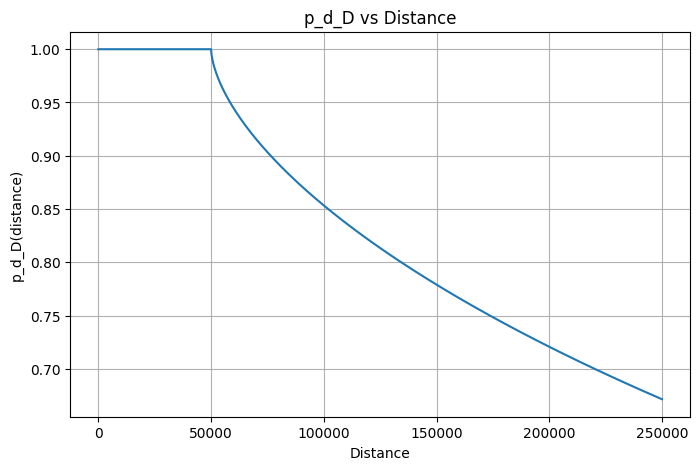

 Distance    p_d_D
        0 1.000000
     1000 1.000000
     2000 1.000000
     3000 1.000000
     4000 1.000000
     5000 1.000000
     6000 1.000000
     7000 1.000000
     8000 1.000000
     9000 1.000000
    10000 1.000000
    11000 1.000000
    12000 1.000000
    13000 1.000000
    14000 1.000000
    15000 1.000000
    16000 1.000000
    17000 1.000000
    18000 1.000000
    19000 1.000000
    20000 1.000000
    21000 1.000000
    22000 1.000000
    23000 1.000000
    24000 1.000000
    25000 1.000000
    26000 1.000000
    27000 1.000000
    28000 1.000000
    29000 1.000000
    30000 1.000000
    31000 1.000000
    32000 1.000000
    33000 1.000000
    34000 1.000000
    35000 1.000000
    36000 1.000000
    37000 1.000000
    38000 1.000000
    39000 1.000000
    40000 1.000000
    41000 1.000000
    42000 1.000000
    43000 1.000000
    44000 1.000000
    45000 1.000000
    46000 1.000000
    47000 1.000000
    48000 1.000000
    49000 1.000000
    50000 1.000000
    51000 0.

In [305]:
# check p_d_Ds.
distances = range(0, 250001)
values = [graph.p_d_D(d) for d in distances]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(distances, values)
plt.xlabel("Distance")
plt.ylabel("p_d_D(distance)")
plt.title("p_d_D vs Distance")
plt.grid(True)
plt.show()

# Table every 1000
step = 1000
df = pd.DataFrame({
    "Distance": list(range(0, 250001, step)),
    "p_d_D": [graph.p_d_D(d) for d in range(0, 250001, step)]
})
print(df.to_string(index=False))

2196.0